# Локализация. Упражнения

В этих упражнениях вам предлагается реализовать простые алгоритмы локализации роботов. На лекции, помимо фильтра частиц, были упомянуты методы триангуляции и альфа-бета фильтр. Давайте их реализуем: обе реализации должны быть сделаны в виде класса, у которого должен быть метод update. Метод update принимает на вход измеренения с камеры о положении ориентиров в сосбтвенной системе координат робота.

В качестве ориентиров будем использовать координаты стоек ворот. Для удобства будем пользоваться упрощенным вариантом, при котором ворота разных цветов. В словаре храняться положения стоек в глобальной системе координат (точка (0, 0) нахождится в центре поля)

In [34]:
!pip3 install matplotlib

In [84]:
landmarks = {
    "blue_posts": [
        [ -4.5, -1.0], [ -4.5, 1.0]
    ],
    "yellow_posts":[
        [ 4.5, -1.0], [ 4.5, 1.0]
    ]
}

Пример данных, которые могут поступать в модуль на одном шаге всей системы. Данные во втором словаре – это данные одометрии с собвственной информацией робота о перемещении за один шаг системы. Для проверки работы придумайте и запишите набор данных с такой же структурой. 

In [96]:
observations = {"yellow_posts":[[4.5, -1],[4.5, 1]], "blue_posts":[]}
shift = {'shift_x':0.0, 'shift_y':0.01, 'shift_angle':-0.4}

### 1) Реализовать локализацию триангуляцией (3 балл)
    

In [74]:
class Robot:
  def __init__(self, x=0, y =0, yaw=0):
    self.x = x
    self.y = y
    self.yaw = yaw
  def set_coord(self, x, y, yaw):
    self.x = float(x)
    self.y = float(y)
    self.yaw = float(yaw)
  def move(self, x,y,yaw):
    orientation = self.yaw + float(-yaw)
    if orientation < 0:
      orientation += math.pi *2
    self.yaw =  orientation % (math.pi *2)
    self.x += x*math.cos(self.yaw)
    self.y += y*math.sin(self.yaw)
    

In [ ]:
import math

In [110]:
class localization_triangulation:
    def __init__(self, myrobot):
      self.myrobot = myrobot
    def update(self, observations):
      if observations['yellow_posts']:
        x1 = observations['yellow_posts'][0][0]
        y1 = observations['yellow_posts'][0][1]
        x2 = observations['yellow_posts'][1][0]
        y2 = observations['yellow_posts'][1][1]

        r1 = math.sqrt(x1*x1 + y1* y1)
        phi1 = math.atan(abs(x1/y1))
        print("phi1 ", phi1)
        r2 = math.sqrt(x2*x2 +y2*y2)

        alpha = math.acos((4 + r1*r1 -r2*r2)/(2*r1*2) )
        print("alpha :", alpha)
        beta = math.acos((4 + r2*r2 -r1*r1)/(2*r2*2) )
        print("beta ", beta)
        self.myrobot.y = 4.5 - r1*math.sin(alpha)
        if r1>r2:
          self.myrobot.x = 1-math.cos(beta)
        elif r1<r2:
          self.myrobot.x = -1 +math.cos(alpha)
        else:
          self.myrobot.x = 0
        if alpha > math.pi/2:
          self.myrobot.yaw = -phi1 - (alpha - math.pi/2)
        elif alpha <math.pi/2:
          self.myrobot.yaw = -phi1 +(math.pi/2 - alpha)
        else: self.myrobot.yaw = -phi1
      



        

In [113]:
ff = localization_triangulation(Robot())
print(ff.myrobot.x)
print(ff.myrobot.y)
print(ff.myrobot.yaw)
ff.update(observations)
print(ff.myrobot.x)
print(ff.myrobot.y)
print(ff.myrobot.yaw)

0
0
0
phi1  1.3521273809209546
alpha : 1.3521273809209546
beta  1.3521273809209546
0
0.0
-1.1334584350470127


### 2) Дополнить предыдущий пункт до альфа-бета фильтра (5 балла)

In [ ]:
class localization_alphabeta:
    
    #put your code here
    
    pass
    
    def update():
        
        #put your code here
        
        pass

### 3) *Дополнительно* Добавьте визуализацию вида сверху  (2 балла)

Например на OpenCV или Matplotlib, например так как было в семинаре, чтобы можно было удобно посмотреть на работу модуля.


In [57]:
class Field:
  def __init__(self, field_param):
    self.field = field_param
    self.w_width = field_param['main_rectangle'][0][0]
    self.w_length = field_param['main_rectangle'][0][1]

In [58]:
parfield = {
    "circles": [
                [0.0, 0.0,1.0]
    ], 
    "lines":[
             [[-3.0,3.0], [0.0, 0.0]]
    ], 
    "points":[
              [0, 0]
    ],
    "main_rectangle":[
                      [6.0, 9.0]
    ], 
    "rectangles":[
                  [[-1, -4.5], 2,1], [[-1, 3.5],2,1]
    ]
}

In [80]:
import math
import matplotlib.pylab as plt
field = Field(parfield)
def visualization(robot, pr, factor = 7):
  plt.figure("robot ", figsize=(field.w_width, field.w_length))
  plt.title('particle filter')

  grid = [-field.w_width/2, field.w_width/2, -field.w_length/2, field.w_length/2]
  ax = plt.axis(grid)
  for el in field.field:
    if el == 'circles':
      for circle in field.field['circles']:
        plot_circle = plt.Circle((circle[0], circle[1]), circle[2], linewidth=2, fill =False, edgecolor = 'r')
        plt.gca().add_patch(plot_circle)
    if el == 'lines':
      for line in field.field['lines']:
        plot_line = plt.Line2D(line[0], line[1], linewidth = 2, linestyle = '-', color = '#330000')
        plt.gca().add_line(plot_line)
    if el == 'rectangles':
      for rectangle in field.field['rectangles']:
        rect = plt.Rectangle(rectangle[0], rectangle[1],rectangle[2], linewidth = 2, linestyle = '-', fill = False)
        plt.gca().add_patch(rect)
    if pr != False:
      circle = plt.Circle((robot.y, robot.x), 1./factor, facecolor='#FF66E9', edgecolor='#FF66E9')
      plt.gca().add_patch(circle)

      arrow = plt.Arrow(robot.y, robot.x, 3*math.sin(robot.yaw)/factor, 3*math.cos(robot.yaw)/factor, width=1/factor)
      plt.gca().add_patch(arrow)

  for lm in landmarks:
    for lms in landmarks[lm]:
      if lm == "yellow_posts":
        circle = plt.Circle((lms[0], lms[1]), 1./factor, facecolor ='#ffff00', edgecolor = '#330000')
        plt.gca().add_patch(circle)
      else:
        circle = plt.Circle((lms[0], lms[1]), 1./factor, facecolor = '#060C73', edgecolor = '#330000')
        plt.gca().add_patch(circle)


0
0
0


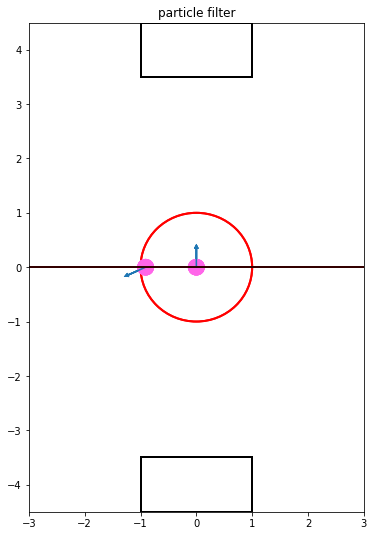

In [112]:
r = Robot()
print(r.x)
print(r.y)
print(r.yaw)
visualization(r, True,7)
r.move(0,1,2)
visualization(r, True,7)



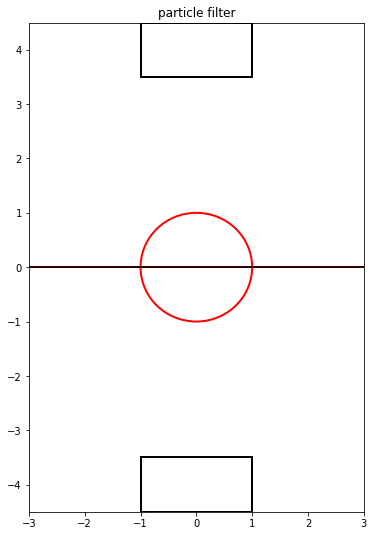

In [92]:
visualization(ff.myrobot, True,7)
